# Filtros FIR Pasa Banda. Diseño con Ventanas

In [3]:
!jt -t monokai

In [1]:
#NOTE importar bibliotecas
import numpy             as np
import matplotlib.pyplot as plt

from scipy import signal

In [17]:
def firdesign(N, fc, sr, ftype='low',info=False):
    sinc = lambda ft,tk: np.sin(2*np.pi*ft*tk)/(np.pi*tk)
    
    ft = fc/float(sr)
    M  = N+1
    tk = np.arange(M+1) - M//2
    
    tk[M//2] = -1
    
    if 'low' in ftype:
        fir       = sinc(ft,tk) 
        fir[M//2] = 2*ft
        tk[M//2]  = 0
    
    elif 'high' in ftype:
        fir       = -sinc(ft,tk) 
        fir[M//2] = 1-2*ft
        tk[M//2]  = 0
    
    else:
        print 'No se especifico tipo de filtro'
        fir = np.zeros(tk.shape[0])
        
    if info:
        print tk,M
        plt.plot(ft*tk,fir,'-o',markersize=9,linewidth=3)
        plt.grid(True)
        
        plt.show()
    return fir

In [14]:
def freq_hz(S,sr):
    w, h = signal.freqz(S)
    H    = 20*np.log10( np.abs(h) )
    W    = np.angle  (h)
    W    = np.unwrap (W)
    W    = np.degrees(W)
    w    = np.linspace(0,sr/2,H.shape[0] )
    
    return w, W, H

[-21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4
  -3  -2  -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14
  15  16  17  18  19  20  21] 42


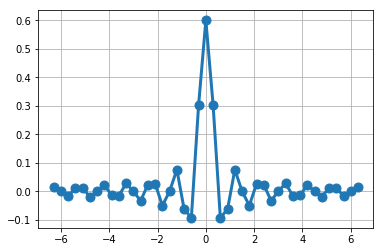

In [18]:
N   = 41
M   = N+1
fcl = 90
fch = 35
sr  = 300

cl_fir = firdesign(N,fcl,sr,info=True)
ch_fir = firdesign(N,fch,sr, ftype='high')
cb_fir =  ch_fir + cl_fir

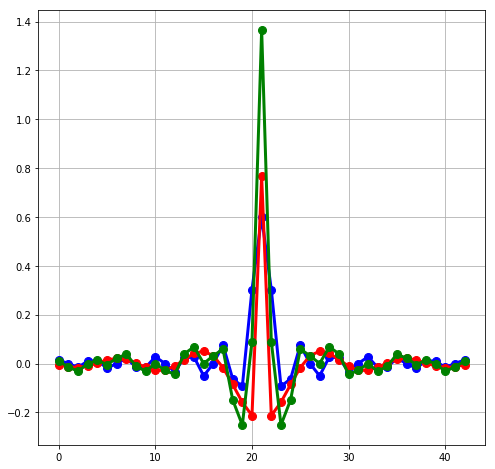

In [19]:
plt.figure(figsize=(8,8))
plt.plot(cl_fir,'-bo',markersize=8,linewidth=3)
plt.plot(ch_fir,'-ro',markersize=8,linewidth=3)
plt.plot(cb_fir,'-go',markersize=8,linewidth=3)
plt.grid(True)
plt.show()

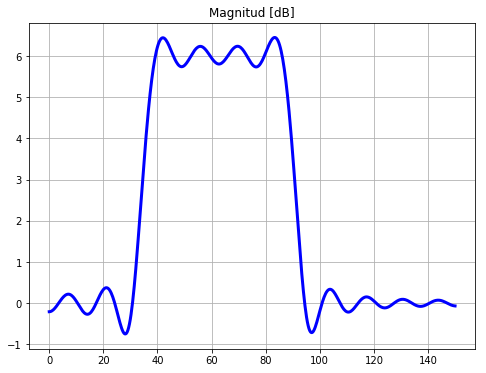

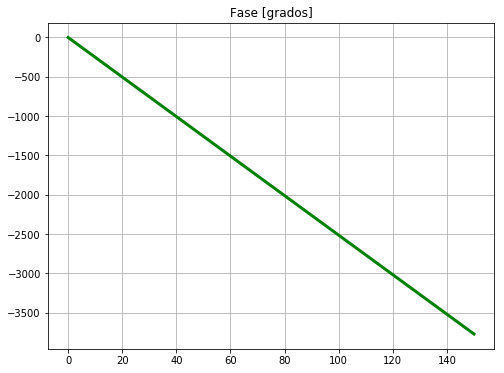

In [20]:
w,W,H = freq_hz(cb_fir,sr)


plt.figure( figsize=(8,6) )
plt.title('Magnitud [dB]')
plt.grid(True)
plt.plot( w,H,'b',linewidth=3 )

plt.figure( figsize=(8,6) )
plt.title('Fase [grados]')
plt.plot( w,W,'g',linewidth=3 )
plt.grid(True)
plt.show()



Ventanas

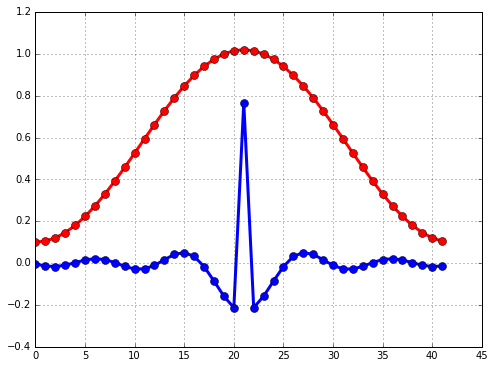

In [8]:
tk   = np.arange(N+1)
hamm = .56 - .46*np.cos( 2*np.pi*tk/float(M) )

plt.figure(figsize=(8,6))
plt.plot(ch_fir,'-bo',linewidth=3,markersize=8)
plt.plot(hamm  ,'-ro',linewidth=3,markersize=8)
plt.grid(True)
plt.show()


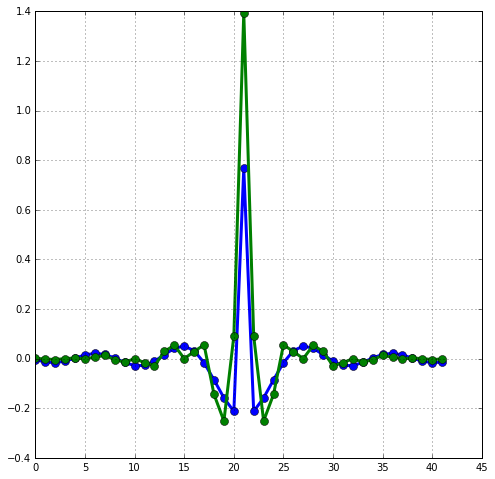

In [9]:
W_fir = cb_fir*hamm

plt.figure(figsize=(8,8))
plt.plot(ch_fir,'-bo',linewidth=3,markersize=8)
plt.plot(W_fir ,'-go',linewidth=3,markersize=8)
plt.grid(True)
plt.show()


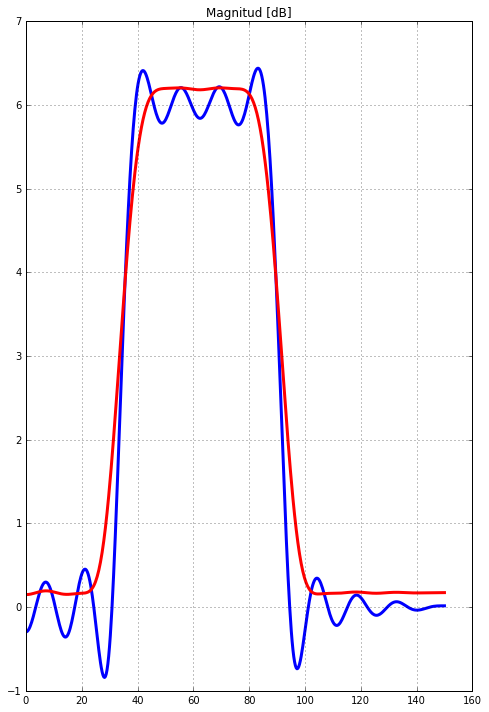

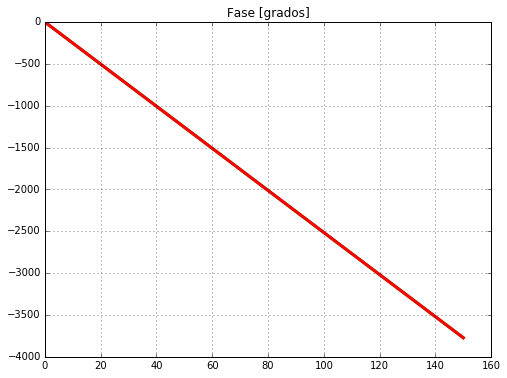

In [10]:
w ,w_hz ,h_hz  = freq_hz(cb_fir,sr)
wW,w_hzW,h_hzW = freq_hz( W_fir,sr)


plt.figure( figsize=(8,12) )
plt.title('Magnitud [dB]')
plt.grid(True)
plt.plot( w ,h_hz ,'b',linewidth=3 )
plt.plot( wW,h_hzW,'r',linewidth=3 )

plt.figure( figsize=(8,6) )
plt.title('Fase [grados]')
plt.plot( w ,w_hz ,'g',linewidth=3 )
plt.plot( wW,w_hzW,'r',linewidth=3 )
plt.grid(True)
plt.show()

